In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.image as mpimg
from sklearn.datasets import load_sample_images

In [2]:
def PCA(X, n = 100):
    U,S,V = np.linalg.svd(X,full_matrices=0)
    S = np.diag(S)
    U,S,V =U[:, :n],S[:n, :n],V.T[:,:n].T
    return np.dot(U, np.dot(S, V))
    

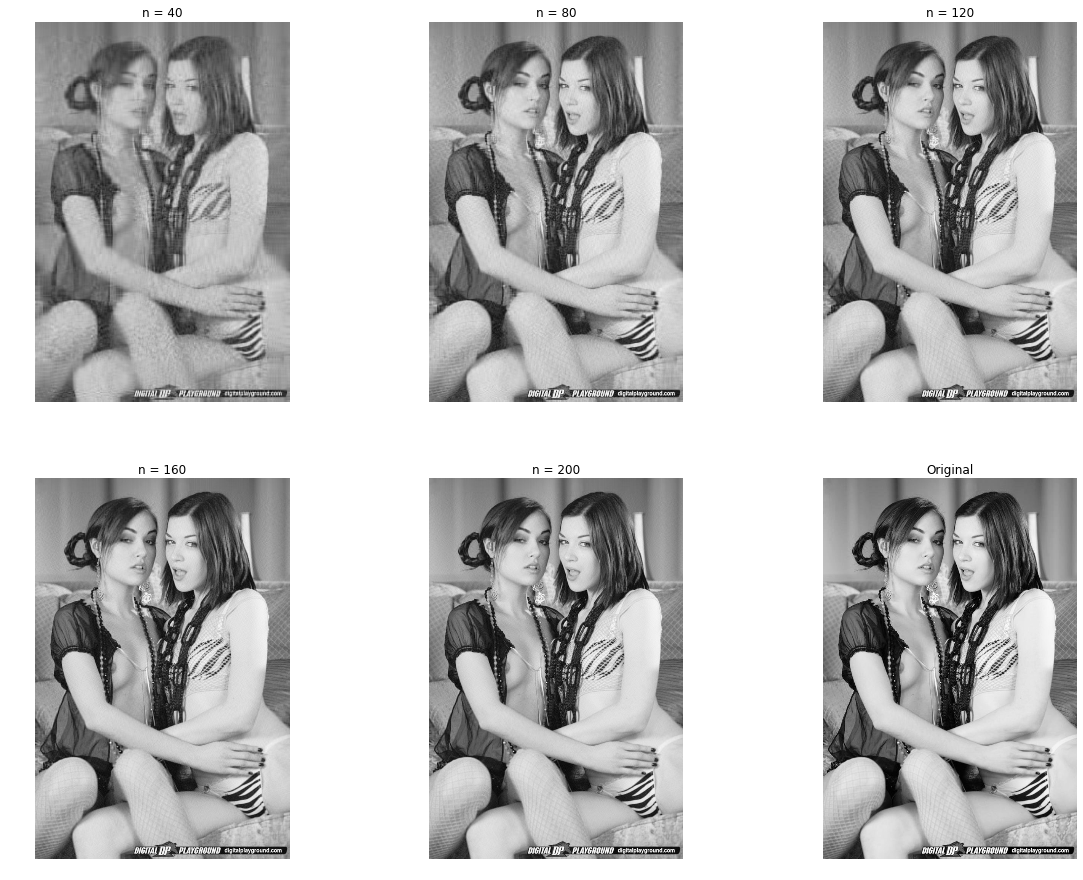

In [5]:
X =  mpimg.imread('/home/julia/B86KuLiCEAAJkmi.png')
# if RGB, convert to grayscale
if len(X.shape) > 2:
    X = np.mean(X,2)

dist1 = []
max_components = 200
step = 40

i = 1
n_columns = 3
n_images = max_components/step/n_columns + 1

fig = plt.figure(figsize=(20, 15))

for n in range(step,max_components+step,step):
    recon = PCA(X,n=n)
    
    dist1.append(np.linalg.norm(X-recon))
    fig.add_subplot(n_images, n_columns, i)
    plt.imshow(recon, cmap='Greys_r')
    plt.axis('off')
    plt.title("n = %d" % n)
    
    i += 1

fig.add_subplot(n_images, n_columns, i)
plt.imshow(X, cmap='Greys_r')
plt.axis('off')
plt.title("Original")

In [4]:
dist1#is it good enough

[42.948269, 26.569422, 18.836987, 14.019533, 10.634306]